In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Image
import math
import feather,os
import seaborn as sns
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split

In [4]:
df_raw = pd.read_csv(r'D:\ML\Wine Classification\raw_wine_data.csv')

In [7]:
df_raw

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Missing values.
 -  It was analysed whether the data set has any kind of cell with an **empty column**.

In [4]:
miss1= dict()
for c in df_raw.columns[:11]:
    miss1[c] = 0
    for k in df_raw[c].isnull():
        if(k==True):
            miss1[c] = miss1.get(c,0)+1
print(miss1)

{'fixed acidity': 0, 'volatile acidity': 0, 'citric acid': 0, 'residual sugar': 0, 'chlorides': 0, 'free sulfur dioxide': 0, 'total sulfur dioxide': 0, 'density': 0, 'pH': 0, 'sulphates': 0, 'alcohol': 0}


- The above analysis shows that there are **no missing values** in the given dataset.

# Describing Variables

In [5]:
df_raw.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Dependent variable - Quality of Wine

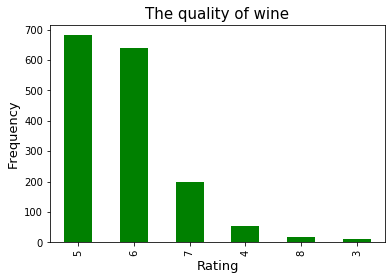

In [86]:
plt.title("The quality of wine",fontsize =15)
plt.xlabel("Rating",fontsize = 13)
plt.ylabel("Frequency", fontsize = 13)
df_raw.quality.value_counts().plot.bar(color = 'green')
plt.savefig('D:\ML\Wine Classification\quality_histo.png',dpi=200)

### - Inference
- It is noted that the **ratings 5 and 6** are the **most common** ratings and the frequency ditribution of the **higher ratings** i.e. **7 and 8** were very less.


In [21]:
df_raw.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


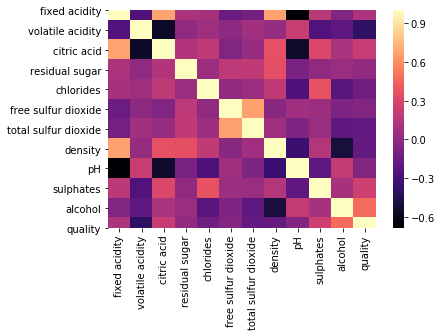

In [87]:
sns.heatmap(df_raw.corr(),cmap='magma')
plt.savefig('D:\ML\Wine Classification\correlation.png',dpi=200)

# Inference from correlation
- It is noted that **citric acid and fixed acidity**, **free sulfur dioxide and total sulfur dioxide** and **density and fixed acidity** were correlated to some extent.
- Hence, one of the feature from these pairs can be chosen to be eliminated to reduce dimensionalilty.
- It is also noted that **alcohol content** has the **strongest positive correlation** with the **wine quality** and on the other hand **volatile acidity** has the **strongest negative correlation** with the **wine quality**.

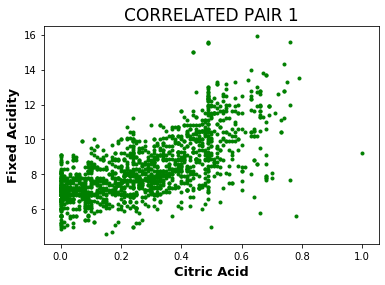

In [88]:
plt.scatter(df_raw['citric acid'],df_raw['fixed acidity'],marker = '.',color = 'green')
plt.xlabel("Citric Acid",fontsize =13,fontweight = 'bold')
plt.ylabel("Fixed Acidity",fontsize = 13,fontweight = 'bold')
plt.title("CORRELATED PAIR 1",fontsize=17)
plt.savefig('D:\ML\Wine Classification\correlated_pair1.png',dpi=200)

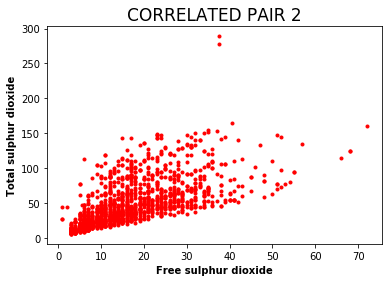

In [89]:
plt.scatter(df_raw['free sulfur dioxide'],df_raw['total sulfur dioxide'],marker = '.',color = 'red')
plt.xlabel("Free sulphur dioxide",fontweight = 'bold')
plt.ylabel("Total sulphur dioxide",fontweight = 'bold')
plt.title("CORRELATED PAIR 2",fontsize = 17)
plt.savefig('D:\ML\Wine Classification\correlated_pair2.png',dpi=200)

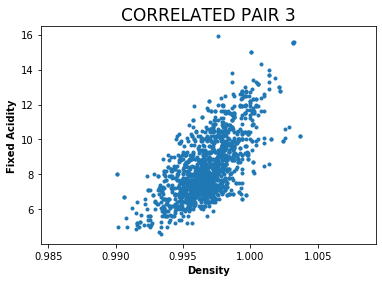

In [90]:
plt.scatter(df_raw['density'],df_raw['fixed acidity'], marker='.')
plt.xlabel("Density",fontweight = 'bold')
plt.ylabel("Fixed Acidity", fontweight = 'bold')
plt.title("CORRELATED PAIR 3",fontsize = 17)
plt.savefig('D:\ML\Wine Classification\correlated_pair3.png',dpi=200)

In [41]:
corr_cols = ['citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'fixed acidity']

# Splitting dataset.
- The data set is transformed into a dataset with a binary column with value **1 for quality > = 7** and **0 otherwise** 
- The dataset is named **data_cls** as a classification model is applied to the dataset to predict its **goodness**.

In [6]:
good = []
for k in df_raw.quality:
    if(k>=7):
        good.append(1)
    else:
        good.append(0)
data_cls = df_raw.drop('quality',axis=1).copy()
data_cls['good'] = good
data_cls.head(n=6)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0


## Saving Dataframe

In [7]:
os.makedirs('feather_data',exist_ok = True)
data_cls.to_feather('feather_data/wine_class_raw')


In [8]:
data_cls = feather.read_dataframe('feather_data/wine_class_raw')

# Classification Model
- In this model, K nearest neighbours classification algorithm is used to classify wine as **good(rating>=7)** or **bad(rating<7).**
- The classifier is iterated over neighbours and a graph is plotted for the **f1 square and acuuracy of model.**
- The **area under ROC curve** is also evaluated for different models.

# Preparing training and test sets.

In [39]:
data_cls.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


# ANALYSIS OF FEATURES
- The probability distributions of features of the dataset are plotted pertaining to their **classes**
- The **CYAN** plot shows the distribution which has the **good** feature as **TRUE**
- The **BLACK** distribution has the **good** feature as **FALSE**

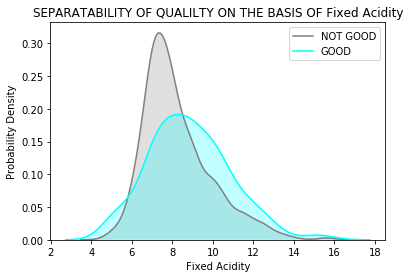

In [91]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['fixed acidity'],shade = True, color = 'grey',label = "NOT GOOD")
sns.kdeplot(data_cls.loc[data_cls['good']==1]['fixed acidity'],shade = True, color = 'cyan',label = "GOOD")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Fixed Acidity")
plt.xlabel("Fixed Acidity")
plt.ylabel("Probability Density")
plt.savefig('D:\ML\Wine Classification\pd_curve_1.png',dpi=200)

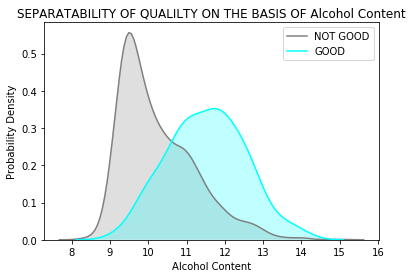

In [92]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['alcohol'],shade = True,color = 'grey',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['alcohol'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Alcohol Content")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Alcohol Content")
plt.ylabel("Probability Density")
plt.savefig('D:\ML\Wine Classification\pd_curve_2.png',dpi=200)

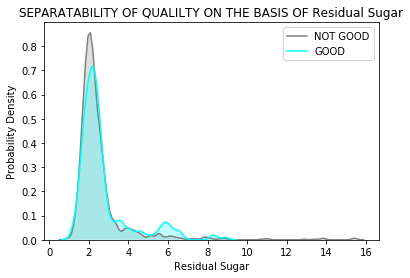

In [93]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['residual sugar'],shade = True,color = 'grey',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['residual sugar'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Residual Sugar")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Residual Sugar")
plt.ylabel("Probability Density")
plt.savefig('D:\ML\Wine Classification\pd_curve_3.png',dpi=200)

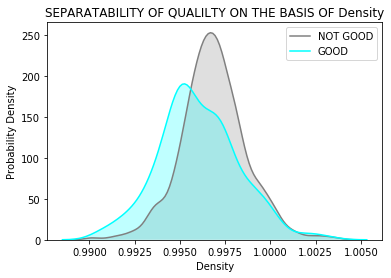

In [94]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['density'],shade = True,color = 'grey',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['density'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Density")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Density")
plt.ylabel("Probability Density")
plt.savefig('D:\ML\Wine Classification\pd_curve_4.png',dpi=200)

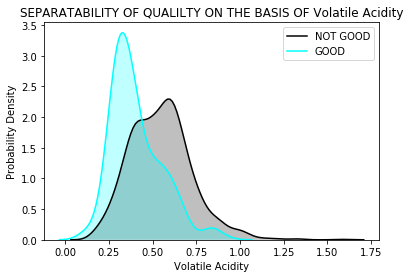

In [95]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['volatile acidity'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['volatile acidity'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Volatile Acidity")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Volatile Acidity")
plt.ylabel("Probability Density")
plt.savefig('D:\ML\Wine Classification\pd_curve_5.png',dpi=200)

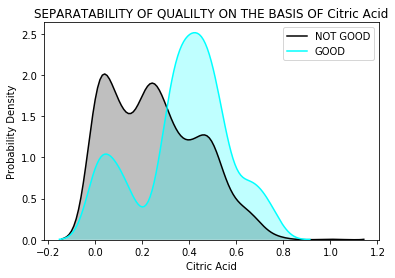

In [96]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['citric acid'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['citric acid'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Citric Acid")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Citric Acid")
plt.ylabel("Probability Density")
plt.savefig('D:\ML\Wine Classification\pd_curve_6.png',dpi=200)

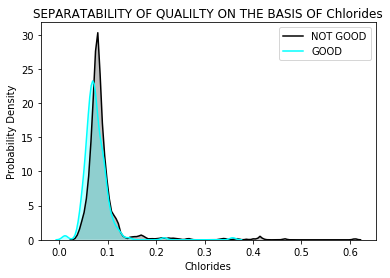

In [97]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['chlorides'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['chlorides'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Chlorides")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Chlorides")
plt.ylabel("Probability Density")
plt.savefig('D:\ML\Wine Classification\pd_curve_7.png',dpi=200)

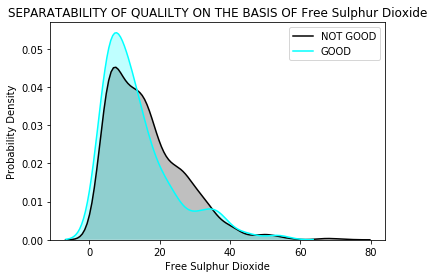

In [98]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['free sulfur dioxide'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['free sulfur dioxide'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Free Sulphur Dioxide")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Free Sulphur Dioxide")
plt.ylabel("Probability Density")
plt.savefig('D:\ML\Wine Classification\pd_curve_8.png',dpi=200)

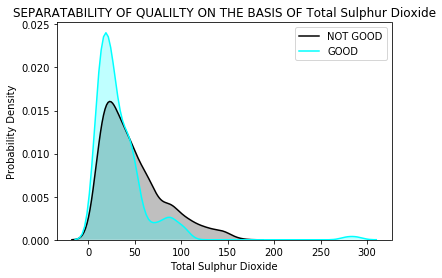

In [99]:
sns.kdeplot(data_cls.loc[data_cls['good']==0]['total sulfur dioxide'],shade = True,color = 'black',label = 'NOT GOOD')
sns.kdeplot(data_cls.loc[data_cls['good']==1]['total sulfur dioxide'],shade = True,color = 'cyan',label = 'GOOD')
plt.xlabel("Total Sulphur Dioxide")
plt.title("SEPARATABILITY OF QUALILTY ON THE BASIS OF Total Sulphur Dioxide")
plt.ylabel("Probability Density")
plt.savefig('D:\ML\Wine Classification\pd_curve_9.png',dpi=200)

- From the analysis of **probability distribution curves** it was noted that none of the variables had **clear distinguishing  curves** which could separate the two types of the classes.
- Hence, it was concluded that the final model had to **include all the features** of the dataset to **be separable on the basis of the wine quality**

In [9]:
train_cls = data_cls.drop('good',axis=1)
y_cls = data_cls['good']

In [10]:
y_cls.value_counts()[1]

217

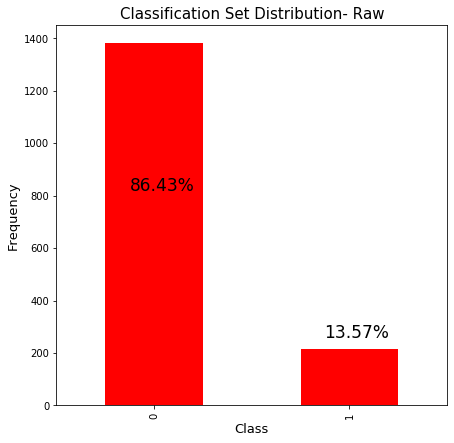

In [76]:
y_cls.value_counts().plot.bar(color ='r',figsize =(7,7))
plt.xlabel("Class",fontsize =13)
plt.ylabel("Frequency",fontsize = 13)
zero = str(round((y_cls.value_counts()[0]/len(y_cls))*100,2))+"%"
ones = str(round((y_cls.value_counts()[1]/len(y_cls))*100,2))+"%"
plt.text(-0.125,820,zero,fontsize = 17)
plt.text(0.87,260,ones,fontsize=17)
plt.title("Classification Set Distribution- Raw",fontsize=15)
plt.savefig(r"D:\ML\Wine Classification\raw_cls_hist.png",dpi=200)

- The above graph shows that the set is **unbalanced** and thus the **normal accuracy of the model would not be a good metric for evaluation.**
- This is because the model would be **more accurate in predicting the 0 class** than it would predict the **1 class**

## Evaluation metrics chosen are-
- **F1 score**
- **Precision**
- **Recall**

In [47]:
def precision(orig,preds):
    tp =0
    fp =0
    for i,j in zip(orig,preds):
        if(i==j and i == 1):
            tp+=1
            continue
        if(i==0 and j==1):
            fp+=1
            continue
    return round(tp/(fp+tp),7)

In [48]:
def recall(orig,preds):
    tp =0
    fn =0
    for i,j in zip(orig,preds):
        if(i==j and i == 1):
            tp+=1
            continue
        if(i==1 and j==0):
            fn+=1
            continue
    return round(tp/(fn+tp),7)

In [56]:
x_train_c,x_test_c,y_train_c,y_test_c = train_test_split(train_cls,y_cls,train_size = 0.8,random_state =42)

# Scaling the data for KNN classifier.
- The **StandardScaler** from preprocessing library is used for the scaling of the features.

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
std = StandardScaler()
std.fit(x_train_c)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [59]:
std_xtrain = pd.DataFrame(std.transform(x_train_c),columns = x_train_c.columns)

In [60]:
std_xtrain.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03,1.279000e+03
mean,-1.239561e-16,4.180480e-16,1.266904e-16,1.736080e-17,-1.854133e-16,-9.478996e-17,-8.038049e-17,2.558044e-14,-1.375149e-15,4.398358e-16,5.815867e-16
std,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00,1.000391e+00
min,-2.160453e+00,-2.291000e+00,-1.394630e+00,-1.153456e+00,-1.550257e+00,-1.442950e+00,-1.234688e+00,-3.613585e+00,-3.713085e+00,-1.661679e+00,-1.917831e+00
25%,-7.099747e-01,-7.285451e-01,-8.827838e-01,-4.567030e-01,-3.538207e-01,-8.609621e-01,-7.487957e-01,-6.031534e-01,-6.602541e-01,-6.303756e-01,-8.724843e-01
50%,-2.458216e-01,-5.892147e-02,-6.383064e-02,-2.476770e-01,-1.713135e-01,-1.819756e-01,-2.629030e-01,1.402550e-02,-1.071561e-02,-2.293130e-01,-2.072638e-01
75%,5.084274e-01,6.107022e-01,8.063071e-01,3.102432e-02,5.175080e-02,4.970108e-01,4.963043e-01,5.773023e-01,5.738691e-01,4.009282e-01,6.480197e-01
max,4.395710e+00,5.856087e+00,3.723828e+00,9.019142e+00,1.059661e+01,5.055920e+00,7.359539e+00,3.727879e+00,4.536054e+00,7.677349e+00,4.259217e+00


In [61]:
std_xtest = pd.DataFrame(std.transform(x_test_c),columns = x_train_c.columns)

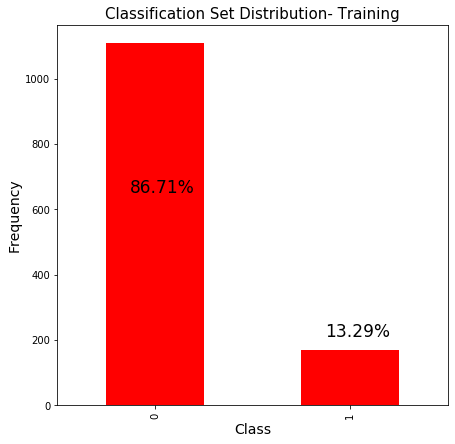

In [82]:
y_train_c.value_counts().plot.bar(color ='r',figsize=(7,7))
plt.xlabel("Class",fontsize =14)
plt.ylabel("Frequency",fontsize= 14)
zero = str(round((y_train_c.value_counts()[0]/len(y_train_c))*100,2))+"%"
ones = str(round((y_train_c.value_counts()[1]/len(y_train_c))*100,2))+"%"
plt.text(-0.13,650,zero,fontsize = 17)
plt.text(0.87,210,ones,fontsize=17)
plt.title("Classification Set Distribution- Training",fontsize=15)
plt.savefig(r"D:\ML\Wine Classification\train_cls_hist.png",dpi=200)

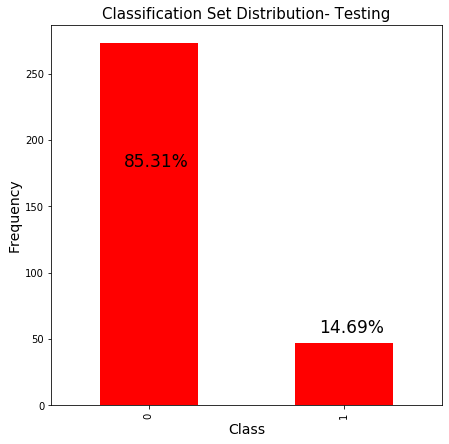

In [85]:
y_test_c.value_counts().plot.bar(color ='r',figsize=(7,7))
plt.xlabel("Class",fontsize = 14)
plt.ylabel("Frequency",fontsize=14)
zero = str(round((y_test_c.value_counts()[0]/len(y_test_c))*100,2))+"%"
ones = str(round((y_test_c.value_counts()[1]/len(y_test_c))*100,2))+"%"
plt.text(-0.13,180,zero,fontsize = 17)
plt.text(0.87,55,ones,fontsize=17)
plt.title("Classification Set Distribution- Testing",fontsize=15)
plt.savefig(r"D:\ML\Wine Classification\test_cls_hist.png",dpi=200)

- The above histograms show us that the **data distribution** in the training and test sets is **same** and thus we can go forward with the analysis with the classifier.

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
corr_cols.append('residual sugar')

In [66]:
corr_cols.append('pH')

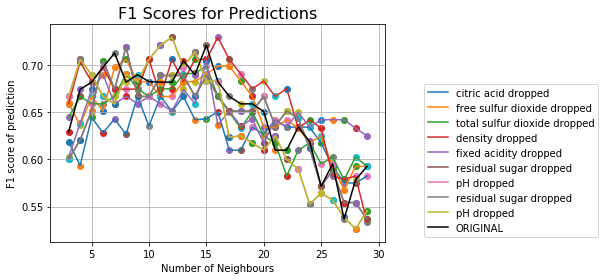

In [100]:
for c in corr_cols:
    f=[]
    for i in range(3,30):
        knn = KNeighborsClassifier(n_neighbors=i,weights = 'distance',metric='euclidean')
        knn.fit(std_xtrain.drop(c,axis=1),y_train_c)
        preds = knn.predict(std_xtest.drop(c,axis=1))
        score = f1_score(y_test_c,preds)
        f.append(score)
        plt.scatter(i,score)
    plt.plot([i for i in range(3,30)],f,label = c+' dropped')
    plt.legend()

f=[]
for i in range(3,30):
    knn = KNeighborsClassifier(n_neighbors=i,weights = 'distance',metric='euclidean')
    knn.fit(std_xtrain,y_train_c)
    preds = knn.predict(std_xtest)
    score = f1_score(y_test_c,preds)
    f.append(score)
    plt.scatter(i,score)
plt.plot([i for i in range(3,30)],f,color='black',label = 'ORIGINAL')
plt.legend(frameon=1,bbox_to_anchor = (1.1,0.75))
plt.title("F1 Scores for Predictions",fontsize = 16)
plt.xlabel("Number of Neighbours")
plt.ylabel("F1 score of prediction")
plt.grid()
plt.savefig('D:\ML\Wine Classification\knn_f1_score.png',dpi=200)

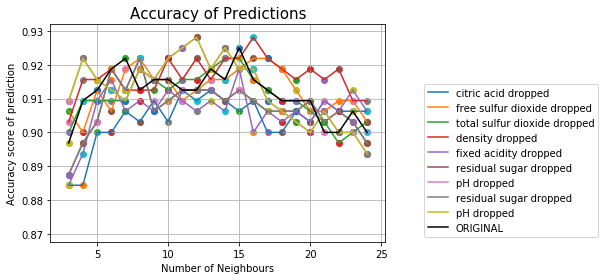

In [101]:
final2 = dict()
for c in corr_cols:
    f=[]
    for i in range(3,25):
        knn = KNeighborsClassifier(n_neighbors=i,weights = 'distance',metric='euclidean')
        knn.fit(std_xtrain.drop(c,axis=1),y_train_c)
        preds = knn.predict(std_xtest.drop(c,axis=1))
        score = accuracy_score(y_test_c,preds)
        f.append(score)
        plt.scatter(i,score)
    final2[c] = f
    plt.plot([i for i in range(3,25)],f,label = c+' dropped')
    plt.legend()
f=[]
for i in range(3,25):
    knn = KNeighborsClassifier(n_neighbors=i,weights = 'distance',metric='euclidean')
    knn.fit(std_xtrain,y_train_c)
    preds = knn.predict(std_xtest)
    score = accuracy_score(y_test_c,preds)
    f.append(score)
    plt.scatter(i,score)
plt.plot([i for i in range(3,25)],f,color='black',label = 'ORIGINAL')
plt.legend(frameon = 1,bbox_to_anchor =(1.1,0.75))
plt.title("Accuracy of Predictions",fontsize = 15)
plt.xlabel("Number of Neighbours")
plt.ylabel("Accuracy score of prediction")
plt.grid()
plt.savefig('D:\ML\Wine Classification\knn_accuracy.png',dpi=200)

# Analysis
- It is noted that **dropping pH and the density** from the data set actually improved upon the **accuracy and the f1 score**.
- Further from the correlation table, it was noted that **pH** had the weakest correlation amongst **density and pH** and hence in the final model, the **pH variable was dropped.**
- Moreover, the best **accuracy and f1 scores** were encountered with **12 nearest neighbours**

## Final Model
#### The final model is a KNN classifier with the following characteristics - 
- Number of Neighbours - 12
- Variable Dropped - pH
- Distance metric - Euclidean
- Weighted - On the basis of distance


In [67]:
knn = KNeighborsClassifier(n_neighbors=12,n_jobs = -1, weights='distance', metric='euclidean')

In [68]:
knn.fit(std_xtrain.drop('pH',axis=1),y_train_c)
preds = knn.predict(std_xtest.drop('pH',axis =1))

In [69]:
f1 = f1_score(y_test_c,preds)
acc = accuracy_score(y_test_c,preds)

# Confusion Matrix of Model

In [71]:
from sklearn.metrics import confusion_matrix

In [72]:
def show_labels(c):
    plt.text(0.4,0.75,c[0][0],fontsize=15)## True negatives
    plt.text(1.4,0.75,c[0][1],fontsize=15)## False positives
    plt.text(0.4,1.25,c[1][0],fontsize=15)## False Negatives
    plt.text(1.4,1.25,c[1][1],fontsize=15)## True Positives

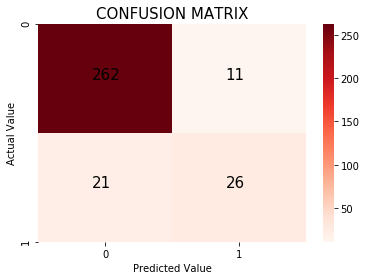

In [102]:
c1 = confusion_matrix(y_test_c,preds)
sns.heatmap(c1,cmap = 'Reds')
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title("CONFUSION MATRIX",fontsize = 15)
show_labels(c1)
plt.savefig('D:\ML\Wine Classification\confusion_matrix.png',dpi=200)

# Model scores...

In [70]:
print("SCORES OF KNN CLASSIFIER NORMALIZED WITH Z1 NORMALISATION")
print('Recall of model:',recall(y_test_c,preds))
print("Precision of model:",precision(y_test_c,preds))
print("Accuracy of model:",acc)
print("F1 Score of model:",round(f1,6))

SCORES OF KNN CLASSIFIER NORMALIZED WITH Z1 NORMALISATION
Recall of model: 0.6595745
Precision of model: 0.8157895
Accuracy of model: 0.928125
F1 Score of model: 0.729412
